# Coursework Part 1: SVMs

## Imports and Data

We will be working with the breast cancer dataset as in the slides.

I have included the minimal sufficient imports to complete the coursework. You are welcome to import other modules.

Sensible comments/observations on any figures/answers will receive credit as in the formative assessments. It is better
to comment why you think your results may be wrong than to just leave a wrong figure!

In [2]:
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data=load_breast_cancer()
X=data.data
y=data.target
X_train, X_test, y_train,y_test = train_test_split(X,y, stratify=y)
X_test+=np.random.rand(*X_test.shape)/20
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
del X
del y

## 1) Linear SVM for classification
### a) For different values of C, use SVC(kernel='linear') and compare the train and test performance of your classifier


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

regularization_params = np.arange(0.001,0.5,0.01) # List of regularization parameters to build models using
regularization_params = np.concatenate((regularization_params, np.arange(0.5, 3, 0.5))) # Adding additional regularization parameters
regularization_params = np.concatenate((regularization_params, np.arange(3, 10, 2))) # Adding additional regularization parameters


models = [] #List of SVMs with varying regularization parameters
train_accuracy = [] #List of calculated training data accuracies
test_accuracy = [] #List of calculated test data accuracies

for C in regularization_params:
    model = SVC(kernel="linear", C=C) # Construction a linear SVM with the iterated regularization parameter
    model.fit(X_train, y_train) # Adjusting the model's weights to attempt to fit the training data provided
    models.append(model) # Adding SVM to list for later use

    y_train_pred = model.predict(X_train) #Predicting the outputs based on inputted training values
    y_test_pred = model.predict(X_test) #Predicting the outputs based on inputted test values

    train_acc = accuracy_score(y_train,y_train_pred) #Comparing the predicted outputs to expected outputs for training data
    test_acc = accuracy_score(y_test,y_test_pred) #Comparing the predicted outputs to expected outputs for test data

    # Adding calculated accuracies to list
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

    # print(f"---------- Regularization Parameter: {C} ----------")
    # print(f"Train accuracy : {train_acc}")
    # print(f"Test accuracy: {test_acc}")

Text(0, 0.5, 'Accuracy')

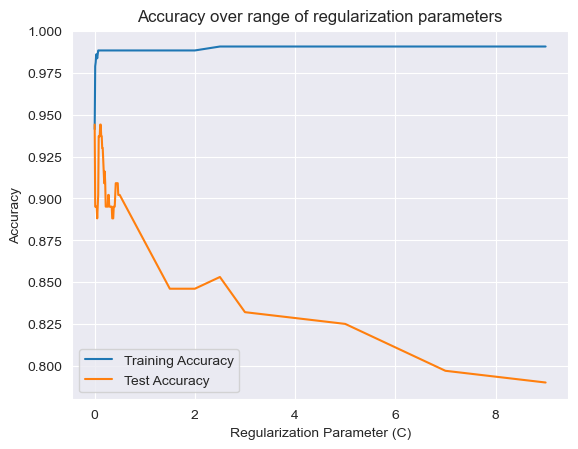

In [4]:
plt.figure()
plt.plot(regularization_params, train_accuracy, label='Training Accuracy')
plt.plot(regularization_params, test_accuracy, label='Test Accuracy')
plt.title('Accuracy over range of regularization parameters')
plt.legend()
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Accuracy")

In [5]:
print("Training data accuracy is expectedly higher than the test data. \nHowever, it is interesting to note that in this case the lower regularization parameter values correspond to higher test accuracies - this is due to SK learn employing 1/C in their calculation, meaning lower inputted C values result in more regularization and thus a more general model.")

Training data accuracy is expectedly higher than the test data. 
However, it is interesting to note that in this case the lower regularization parameter values correspond to higher test accuracies - this is due to SK learn employing 1/C in their calculation, meaning lower inputted C values result in more regularization and thus a more general model.


### b) For each C compare the number of support vectors

Text(0, 0.5, 'Count')

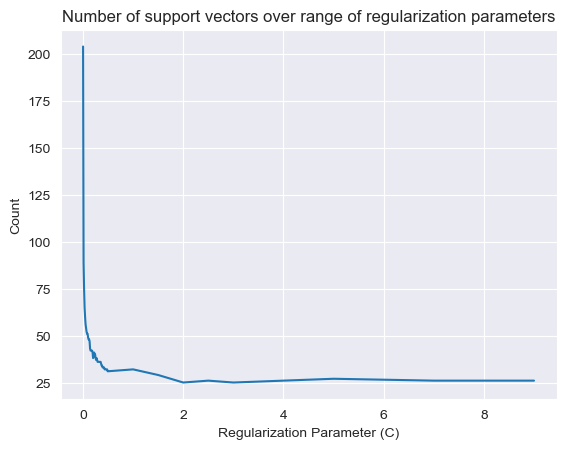

In [6]:
support_vectors = [] #initializing list of support vector numbers per model

for model in models:
    num_sv = len(model.support_vectors_) # Extracting number of support vectors for each model
    support_vectors.append(num_sv)

plt.figure()
plt.plot(regularization_params, support_vectors)
plt.title('Number of support vectors over range of regularization parameters')
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Count")

In [7]:
print("As previously mentioned, the value of C taken by SK Learn is effectively 1/C. \nThus, an increased inputted C will result in less regularisation. This in turn means that the model will prioritise finding a hyperplane which correctly classifies as many of the training data points as possible, as opposed to maximising the margin between the support vectors and the specified hyperplane. Therefore, there will be less data points within the margin and less \"support vectors\".")

As previously mentioned, the value of C taken by SK Learn is effectively 1/C. 
Thus, an increased inputted C will result in less regularisation. This in turn means that the model will prioritise finding a hyperplane which correctly classifies as many of the training data points as possible, as opposed to maximising the margin between the support vectors and the specified hyperplane. Therefore, there will be less data points within the margin and less "support vectors".


### c) For an optimal value of C, compare the performance of the support vector classifier to Logistic regression/Nearest Centroid for different sized subsets of the training data

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid

def evaluate_models(C, subset_X, subset_Y):
    SVM = SVC(kernel="linear", C=C)
    logistic_regression = LogisticRegression() # creating a logistic regression model
    nearest_centroid = NearestCentroid() # creating a nearest centroid model

    # Adjusting each model's weights to attempt to fit the subset of training data
    SVM.fit(subset_X, subset_Y)
    logistic_regression.fit(subset_X, subset_Y)
    nearest_centroid.fit(subset_X, subset_Y)

    # Predicting the test values using each model
    svm_pred = SVM.predict(X_test)
    lr_pred = logistic_regression.predict(X_test)
    nc_pred = nearest_centroid.predict(X_test)

    #Comparing the predicted outputs to expected outputs for each model
    svm_acc = accuracy_score(y_test,svm_pred)
    lr_acc = accuracy_score(y_test,lr_pred)
    nc_acc = accuracy_score(y_test,nc_pred) #
    return svm_acc, lr_acc, nc_acc

In [9]:
optimum_C_index = np.argmax(test_accuracy) # Optimum C from values chosen has the same index as the maximum test accuracy
optimum_C = regularization_params[optimum_C_index] # retrieving optimum C from list

size_of_full_data = len(X_train) #length of full training set
percentage_of_data = np.arange(0.2, 1.1, 0.1)
subset_size = percentage_of_data*size_of_full_data #size splits for the subset to be broken down into - taking indexes from 0 to percentage of full size
subset_size = np.rint(subset_size).astype(int) # rounding and converting to integer values

accuracies = [[],[],[]]

for size in subset_size:
    subset_X = X_train[:size]
    subset_Y = y_train[:size]
    svm_acc, lr_acc, nc_acc = evaluate_models(optimum_C, subset_X, subset_Y)

    # Appending the accuracy of each model to the accuracies list
    accuracies[0].append(svm_acc)
    accuracies[1].append(lr_acc)
    accuracies[2].append(nc_acc)

Text(0, 0.5, 'Accuracy')

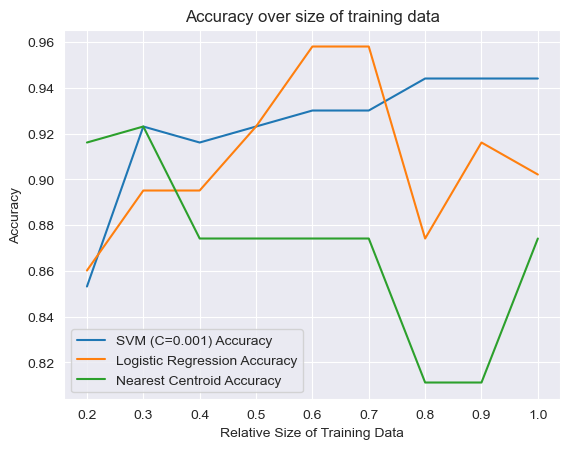

In [10]:
plt.figure()
plt.plot(percentage_of_data, accuracies[0], label=f'SVM (C={optimum_C}) Accuracy')
plt.plot(percentage_of_data, accuracies[1], label='Logistic Regression Accuracy')
plt.plot(percentage_of_data, accuracies[2], label='Nearest Centroid Accuracy')
plt.title('Accuracy over size of training data')
plt.legend()
plt.xlabel("Relative Size of Training Data")
plt.ylabel("Accuracy")

In [11]:
print("Interestingly, despite the SVC and LR models having been tried and tested at handling small dataset sizes effectively, the NC algorithm is often able to have a higher accuracy than its counterparts. In order to more accurately assess the models, their average accuracies must be drawn over multiple iterations")

Interestingly, despite the SVC and LR models having been tried and tested at handling small dataset sizes effectively, the NC algorithm is often able to have a higher accuracy than its counterparts. In order to more accurately assess the models, their average accuracies must be drawn over multiple iterations


In [12]:
num_iterations = 500

mean_accuracies = [[],[],[]]
for size in subset_size:
    subset_X = X_train[:size]
    subset_Y = y_train[:size]
    iter_accuracy = [[],[],[]]
    for i in range(num_iterations):
        svm_acc, lr_acc, nc_acc = evaluate_models(optimum_C, subset_X, subset_Y)
        # Appending the accuracy of each model to the accuracies list
        iter_accuracy[0].append(svm_acc)
        iter_accuracy[1].append(lr_acc)
        iter_accuracy[2].append(nc_acc)

    svm_acc_mean = np.mean(iter_accuracy[0])
    lr_acc_mean = np.mean(iter_accuracy[1])
    nc_acc_mean = np.mean(iter_accuracy[2])

    # Appending the mean accuracy of each model to the accuracies list
    mean_accuracies[0].append(svm_acc_mean)
    mean_accuracies[1].append(lr_acc_mean)
    mean_accuracies[2].append(nc_acc_mean)


Text(0, 0.5, 'Accuracy')

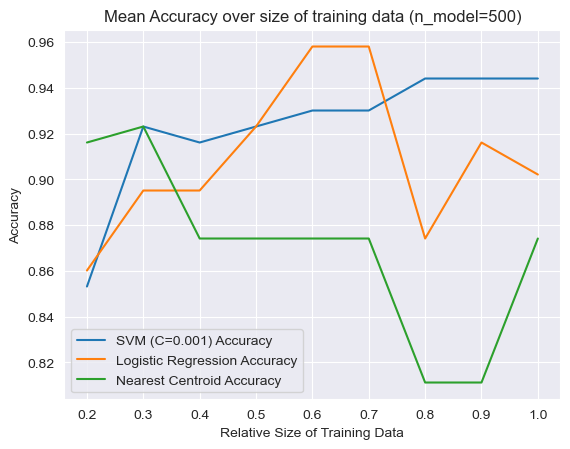

In [13]:
plt.figure()
plt.plot(percentage_of_data, mean_accuracies[0], label=f'SVM (C={optimum_C}) Accuracy')
plt.plot(percentage_of_data, mean_accuracies[1], label='Logistic Regression Accuracy')
plt.plot(percentage_of_data, mean_accuracies[2], label='Nearest Centroid Accuracy')
plt.title(f'Mean Accuracy over size of training data (n_model={num_iterations})')
plt.legend()
plt.xlabel("Relative Size of Training Data")
plt.ylabel("Accuracy")

In [14]:
print(f"With the evaluation being run over {num_iterations} intervals, we can see the mean accuracies for each model. The models are all similar in scope yet again. Having run this test several times, the SVM and logistic regression models typically have quite higher accuracies than the nearest centroid over small datasets.")

With the evaluation being run over 500 intervals, we can see the mean accuracies for each model. The models are all similar in scope yet again. Having run this test several times, the SVM and logistic regression models typically have quite higher accuracies than the nearest centroid over small datasets.


### d) For difference values of nu, compare the train and test error as well as the number of support vectors

In [15]:
from sklearn.svm import NuSVC
nu_values = np.arange(0.05, 0.75, 0.05)

models = [] #List of SVMs with varying regularization parameters
train_accuracy = [] #List of calculated training data accuracies
test_accuracy = [] #List of calculated test data accuracies

for nu in nu_values:
    model = NuSVC(kernel="linear", nu=nu) # Construction a linear SVM with the iterated regularization parameter
    model.fit(X_train, y_train) # Adjusting the model's weights to attempt to fit the training data provided
    models.append(model) # Adding SVM to list for later use

    y_train_pred = model.predict(X_train) #Predicting the outputs based on inputted training values
    y_test_pred = model.predict(X_test) #Predicting the outputs based on inputted test values

    train_acc = accuracy_score(y_train,y_train_pred) #Comparing the predicted outputs to expected outputs for training data
    test_acc = accuracy_score(y_test,y_test_pred) #Comparing the predicted outputs to expected outputs for test data

    # Adding calculated accuracies to list
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

Text(0, 0.5, 'Accuracy')

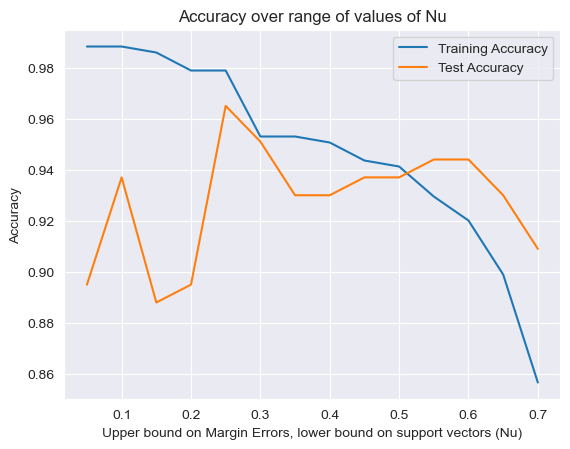

In [16]:
plt.figure()
plt.plot(nu_values, train_accuracy, label='Training Accuracy')
plt.plot(nu_values, test_accuracy, label='Test Accuracy')
plt.title('Accuracy over range of values of Nu')
plt.legend()
plt.xlabel("Upper bound on Margin Errors, lower bound on support vectors (Nu)")
plt.ylabel("Accuracy")

In [17]:
print("The parameter nu is an upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors relative to the total number of training examples. \nThis explains the inverse relationship between Nu and the Training accuracy, as higher Nu values allow for a higher maximum percentage of training data to be misclassified. The test accuracy's value increases at the beginning but gradually decreases as the training data begins to be misclassified.")

The parameter nu is an upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors relative to the total number of training examples. 
This explains the inverse relationship between Nu and the Training accuracy, as higher Nu values allow for a higher maximum percentage of training data to be misclassified. The test accuracy's value increases at the beginning but gradually decreases as the training data begins to be misclassified.


Text(0, 0.5, 'Count')

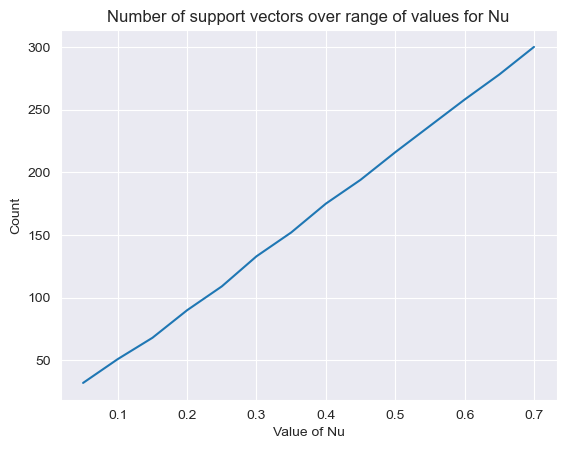

In [18]:
support_vectors = [] #initializing list of support vector numbers per model

for model in models:
    num_sv = len(model.support_vectors_) # Extracting number of support vectors for each model
    support_vectors.append(num_sv)

plt.figure()
plt.plot(nu_values, support_vectors)
plt.title('Number of support vectors over range of values for Nu')
plt.xlabel("Value of Nu")
plt.ylabel("Count")

In [19]:
print("As Nu is a lower bound of the fraction of support vectors relative to the total number of training examples, and the number of training examples is constant - this proportional increase of the number of support vectors relative to Nu is as expected.")

As Nu is a lower bound of the fraction of support vectors relative to the total number of training examples, and the number of training examples is constant - this proportional increase of the number of support vectors relative to Nu is as expected.


## 2) Kernel Support Vector Machines

### a) For different values of degree (and default values of C) compare the performance of a support vector classifier

In [20]:
degree = range(1,25)

test_accuracy = []
train_accuracy = []

for d in degree:
    model = SVC(kernel='poly', degree=d)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train) #Predicting the outputs based on inputted training values
    y_test_pred = model.predict(X_test) #Predicting the outputs based on inputted test values

    train_acc = accuracy_score(y_train,y_train_pred) #Comparing the predicted outputs to expected outputs for training data
    test_acc = accuracy_score(y_test,y_test_pred) #Comparing the predicted outputs to expected outputs for test data

    # Adding calculated accuracies to list
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

Text(0, 0.5, 'Accuracy')

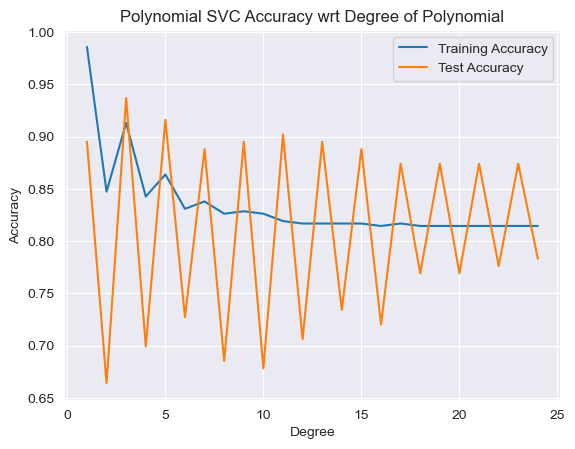

In [21]:
plt.figure()
plt.plot(degree, train_accuracy, label='Training Accuracy')
plt.plot(degree, test_accuracy, label='Test Accuracy')
plt.title('Polynomial SVC Accuracy wrt Degree of Polynomial')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Accuracy")

In [22]:
print("The training accuracy very quickly steadies into around an 82% accuracy, however the test accuracy varies by large amounts between consecutive even (lower accuracy) and odd (higher accuracy) degree polynomials.")

The training accuracy very quickly steadies into around an 82% accuracy, however the test accuracy varies by large amounts between consecutive even (lower accuracy) and odd (higher accuracy) degree polynomials.


### b) For the optimal degree polynomial kernel, compare the performance of the polynomial and linear svm classifiers

In [30]:
optimum_degree = degree[np.argmax(test_accuracy)] # taking index of the highest test accuracy, we find the optimum degree from those tested

# using optimum C from earlier
poly_svc = SVC(kernel='poly', degree=optimum_degree)
linear_svc = SVC(kernel='linear', C=optimum_C)

poly_svc.fit(X_train, y_train)
linear_svc.fit(X_train, y_train)

poly_pred = poly_svc.predict(X_test)
linear_pred = linear_svc.predict(X_test)

# Finding error rate of each model to allow better visualisation
poly_error_rate = 1 - accuracy_score(y_test, poly_pred)
linear_error_rate = 1 - accuracy_score(y_test, linear_pred)

Text(0, 0.5, 'Error Rate')

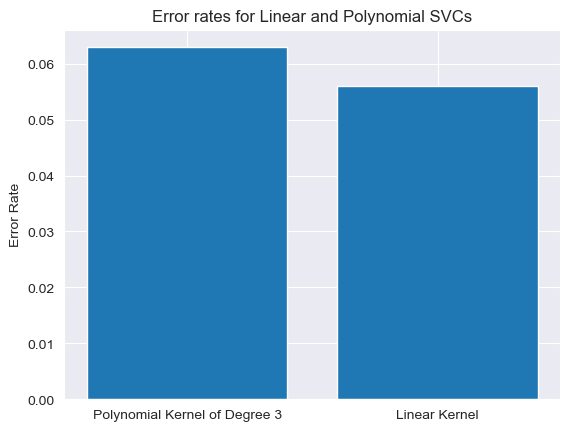

In [31]:
plt.figure()
error_rates = [poly_error_rate, linear_error_rate]
labels = [f"Polynomial Kernel of Degree {optimum_degree}", "Linear Kernel"]

plt.bar(labels, error_rates)
plt.title("Error rates for Linear and Polynomial SVCs")
plt.ylabel("Error Rate")

In [25]:
print("Using default values of C, the polynomial kernel can massively outperform the linear kernel. However, the graph above shows the chosen optimum C value for a linear kernel, which in this case outperforms the polynomial kernel.")

Using default values of C, the polynomial kernel can massively outperform the linear kernel. This graph also demonstrates the necessity of fine-tuning the values of parameters such as the degree and C value used.


## 3) Distribution of Errors (similar to lecture slides!)

### a) Using s=[342, 273, 205, 137, 68, 34, 27, 20] and taking 100 random samples of size s without replacement from the training data compare the distribution of errors or accuracy for the 'nearest centroid' classifier and a linear SVC

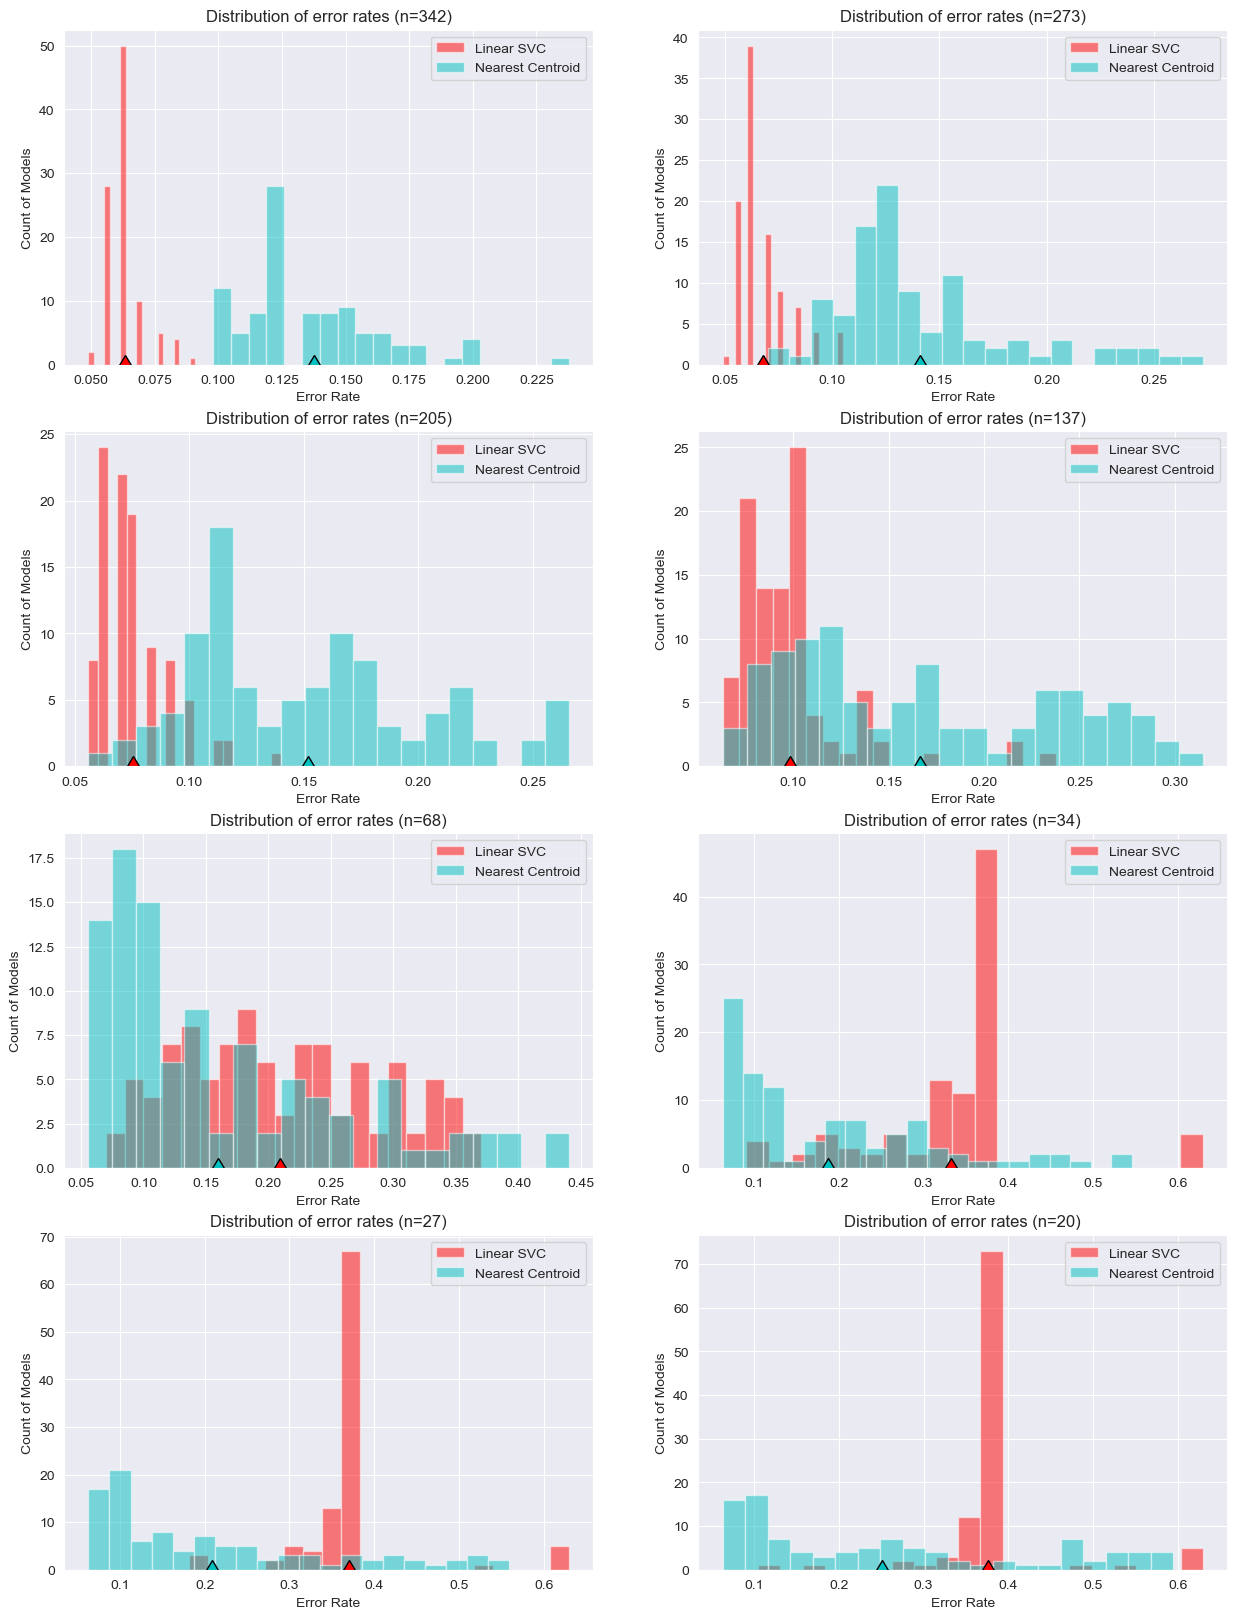

In [28]:
import random

s=[342, 273, 205, 137, 68, 34, 27, 20]
n_bins = 20

plt.figure(figsize=(15,20))
plot=1

for size in s:
    nc_err_rate = []
    svc_err_rate = []
    for i in range(100):
        # will sample random indexes so can take both X and y subsets as needed
        sample_indexes = random.sample(range(len(y_train)), size)

        X_sample = X_train[sample_indexes]
        y_sample = y_train[sample_indexes]

        svc = SVC(kernel="linear", C=optimum_C)
        nearest_centroid = NearestCentroid()

        svc.fit(X_sample, y_sample)
        nearest_centroid.fit(X_sample, y_sample)

        svc_pred = svc.predict(X_test)
        nc_pred = nearest_centroid.predict(X_test)

        #error rates are 1 - accuracy score
        _svc_err_rate = 1 - accuracy_score(y_test, svc_pred)
        _nc_err_rate = 1 - accuracy_score(y_test, nc_pred)

        svc_err_rate.append(_svc_err_rate)
        nc_err_rate.append(_nc_err_rate)

    #showing means of all iterations on graph
    mean_svc = np.mean(svc_err_rate)
    mean_nc = np.mean(nc_err_rate)

    plt.subplot(4,2,plot)
    plot += 1
    plt.hist(svc_err_rate, bins = n_bins, alpha=0.5, label="Linear SVC", color='r')
    plt.hist(nc_err_rate, bins = n_bins, alpha=0.5, label="Nearest Centroid", color='c')

    plt.plot(mean_svc, 0, "rd", mec="k", ms=10)
    plt.plot(mean_nc, 0, "cd", mec="k", ms=10)
    plt.legend()
    plt.xlabel("Error Rate")
    plt.ylabel("Count of Models")
    plt.title(f"Distribution of error rates (n={size})")

In [ ]:
print("At higher sample sizes, the nearest centroid method outperforms the linear SVC by a large margin. However, SVC shines in small dataset sizes and performs very well as the dataset size decreases")